# Time and symbol distribution of delisting announcements/news
Data will be shown in GMT (Greenwich Mean Time): one of the well-known names of UTC+0 time zone. Checked pairs only with usdt. Collected data - Binance only for now

# Conclusion
You can start tracking delisting announcements approximately 20 days after the last announcement, specifically at the beginning of the 6-7-8 AM GMT window. The longer the days interval since the previous announcement, the higher the probability that a new one will be posted soon.

There’s no need to monitor on weekends, as announcements are exclusively posted on weekdays.

Some time ago, Binance announced a stricter policy regarding token delistings. Considering this and the 2024 statistics, we can expect 30+ tokens to be delisted throughout the year, with 4-6 tokens per announcement, of which 1-3 are typically traded on futures markets—making them potential shorting opportunities.

It’s also important to note that we plan to expand our analytics and support for other centralized exchanges (CEX) such as Bybit, Coinbase, etc and later extend to decentralized exchanges (DEX). This will enable us to identify shorting opportunities across almost all tokens.

From 2023 to 2025, Binance has been following a more structured announcement schedule, typically posting within the first two minutes of the hour. However, it’s still important to consider potential deviations or unexpected delays.

# Details:
1) The average number of delisting announcements per year is 6-7, with approximately one announcement every two months
2) The distribution of announcements within a year is approximately normal, except in the second quarter, where only one announcement is observed instead of two
3) No announcements have ever been posted on weekends
4) In 2024, announcements were only posted on Monday, Tuesday, and Wednesday, but this pattern does not seem significant
5) In 2024, only one announcement was posted outside the 6-8 AM GMT window
6) In 2024, 7 out of 8 announcements were posted within the first two minutes of the hour
7) The average interval between announcements ranges from 35 to 75 days. Interestingly, the pattern appears cyclical: 75-35-25 days, followed by another 75-35-25 cycle
8) In 2024, each announcement included 3-6 tokens for delisting
9) One-third of delisted tokens were traded on Binance futures




In [1]:
# init base notebook config
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

from src.utilities.init import init_general_config

init_general_config()

Collecting old delisting articles from Binance Announcements

In [2]:
from src.binance_delisting_tracker import BinanceDelistingTracker
import pandas as pd

tracker = BinanceDelistingTracker(deque_limit=None)
tracker.collect_delisting_articles(pages=13)
articles = tracker.get_articles()

Page 13 fetched successfully
✅ Tokens to delist: ['BCD', 'CND', 'MTH', 'NCASH', 'YOYO'] | On date: 2022-03-08
Page 12 fetched successfully
✅ Tokens to delist: ['HEGIC', 'RENBTC', 'SUSD'] | On date: 2022-04-11
Page 11 fetched successfully
✅ Tokens to delist: ['GRS', 'NAS', 'GO'] | On date: 2022-07-08
✅ Tokens to delist: ['EZ', 'QSP', 'BRD', 'NXS', 'NAV', 'MDA', 'SPARTA'] | On date: 2022-08-11
✅ Tokens to delist: ['DNT', 'NBS', 'BTG', 'TCT'] | On date: 2022-10-24
Page 10 fetched successfully
✅ Tokens to delist: ['MITH', 'TRIBE', 'REP', 'BTCST'] | On date: 2022-12-22
✅ Tokens to delist: ['BEAM'] | On date: 2023-01-26
Page 9 fetched successfully
✅ Tokens to delist: ['AION', 'MIR', 'ANC'] | On date: 2023-02-27
✅ Tokens to delist: ['HNT', 'WABI'] | On date: 2023-03-24
✅ Tokens to delist: ['QLC', 'NEBL', 'AUTO'] | On date: 2023-04-18
Page 8 fetched successfully
Page 7 fetched successfully
✅ Tokens to delist: ['SNM', 'SRM', 'YFII'] | On date: 2023-08-22
Page 6 fetched successfully
Page 5 fetch

In [3]:
timestamps = [article['article_timestamp'] for article in articles]
df = pd.DataFrame({'timestamp': timestamps})
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

df['year'] = df['datetime'].dt.year
df['quarter'] = df['datetime'].dt.quarter
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday  # monday = 0, Sunday = 6
df['weekday_name'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

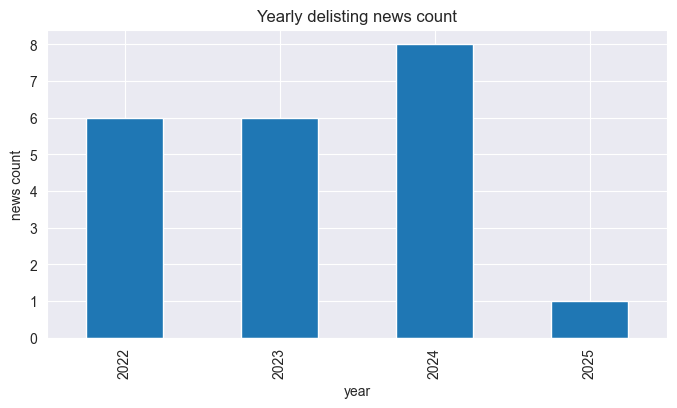

In [5]:
plt.figure(figsize=(8, 4))
df.groupby('year').size().plot(kind='bar')
plt.title('Yearly delisting news count')
plt.xlabel('year')
plt.ylabel('news count')
plt.show()

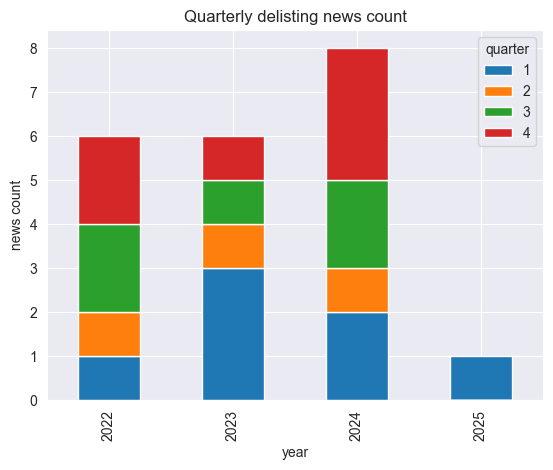

In [6]:
df.groupby(['year', 'quarter']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)
plt.title('Quarterly delisting news count')
plt.xlabel('year')
plt.ylabel('news count')
plt.legend(title='quarter')
plt.show()

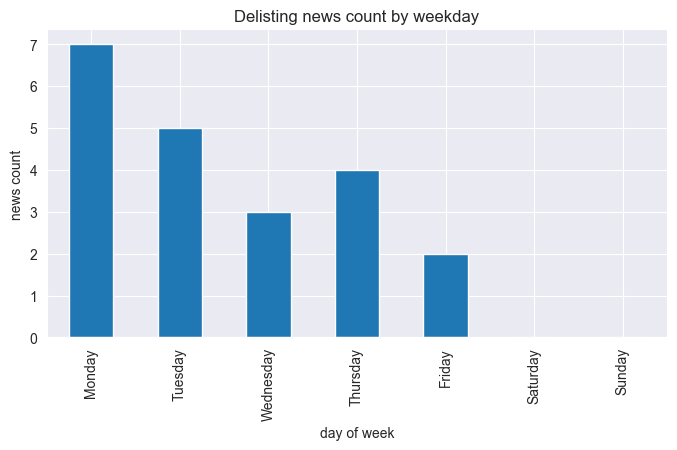

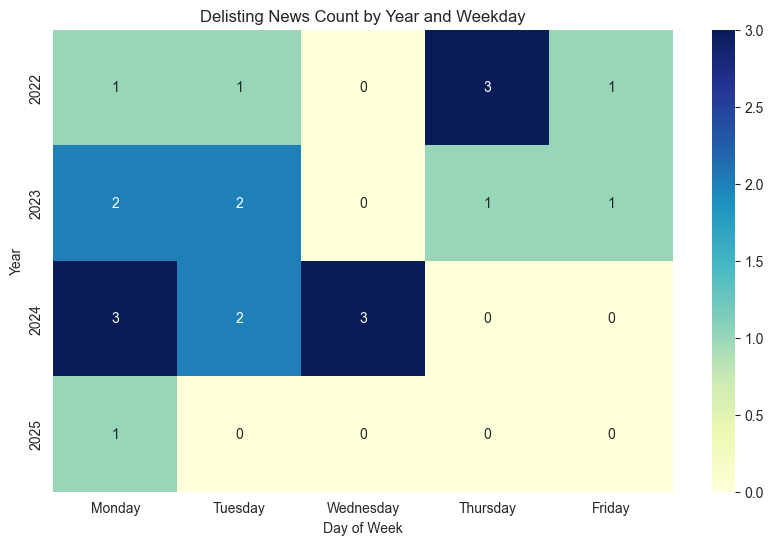

In [7]:
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday_name'] = pd.Categorical(df['weekday_name'], categories=weekdays_order, ordered=True)
plt.figure(figsize=(8, 4))
df.groupby('weekday_name', observed=True).size().reindex(weekdays_order).plot(kind='bar')
plt.title('Delisting news count by weekday')
plt.xlabel('day of week')
plt.ylabel('news count')
plt.show()

heatmap_data = df.groupby(['year', 'weekday_name'], observed=True).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Delisting News Count by Year and Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Year')
plt.show()

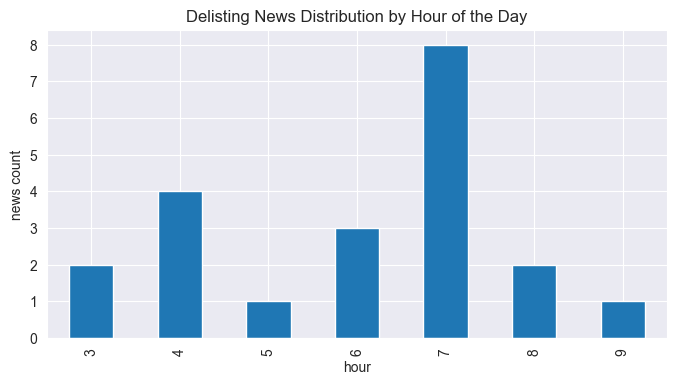

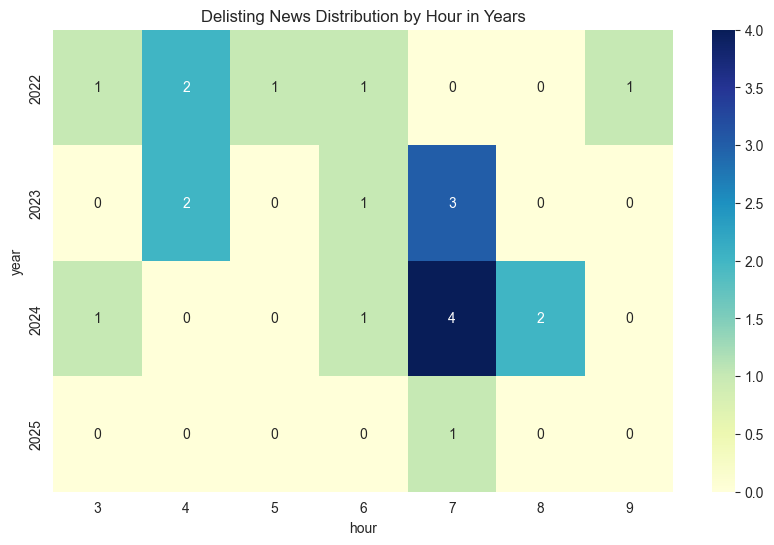

In [8]:
plt.figure(figsize=(8, 4))
df.groupby('hour').size().plot(kind='bar')
plt.title('Delisting News Distribution by Hour of the Day')
plt.xlabel('hour')
plt.ylabel('news count')
plt.show()

heatmap_data = df.groupby(['year', 'hour'], observed=True).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Delisting News Distribution by Hour in Years')
plt.xlabel('hour')
plt.ylabel('year')
plt.show()

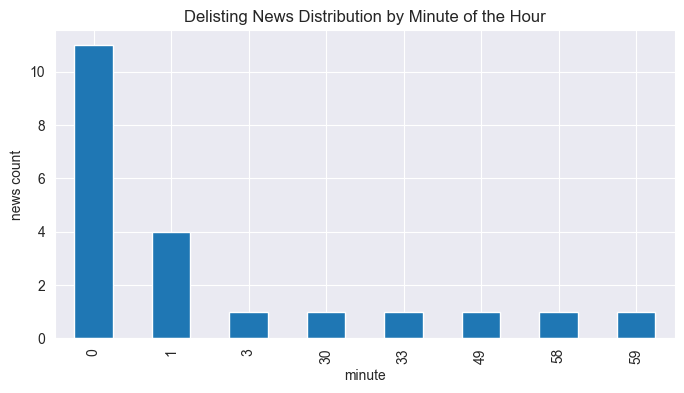

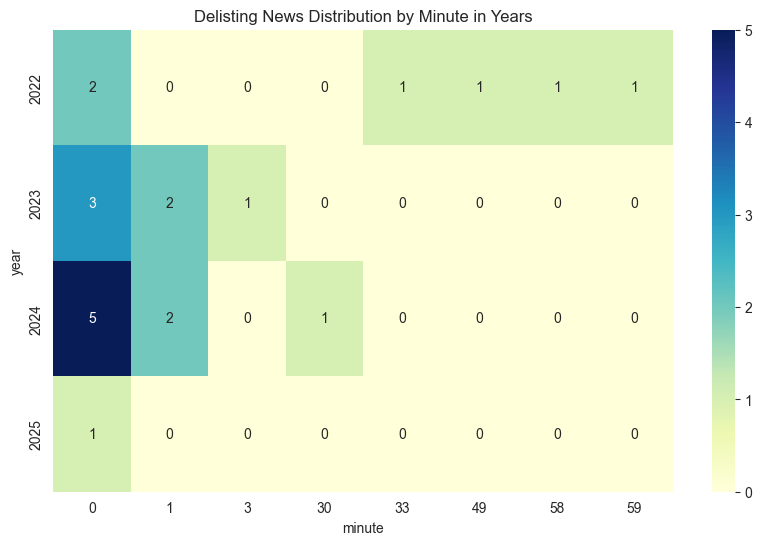

In [9]:
plt.figure(figsize=(8, 4))
df.groupby('minute').size().plot(kind='bar')
plt.title('Delisting News Distribution by Minute of the Hour')
plt.xlabel('minute')
plt.ylabel('news count')
plt.show()

heatmap_data = df.groupby(['year', 'minute'], observed=True).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Delisting News Distribution by Minute in Years')
plt.xlabel('minute')
plt.ylabel('year')
plt.show()

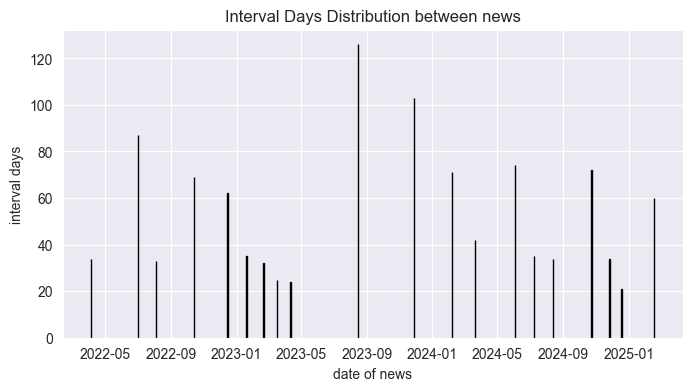

In [10]:
df_sorted = df.sort_values('datetime')
df_sorted['interval_days'] = df_sorted['datetime'].diff().dt.days
plt.figure(figsize=(8, 4))
plt.bar(df_sorted['datetime'][1:], df_sorted['interval_days'][1:], edgecolor='black', )
plt.title('Interval Days Distribution between news')
plt.xlabel('date of news')
plt.ylabel('interval days')
plt.show()


2025-03-17 17:15:05.946976
Added weight 1, total used: 1/1200

2025-03-17 17:15:05.956160
Updated weight limit to 2400

2025-03-17 17:15:06.322834
Added weight 1, total used: 2/2400

2025-03-17 17:15:06.330400
Updated weight limit to 2400


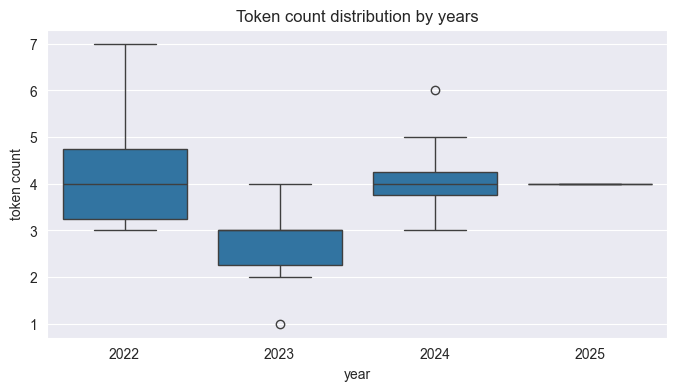

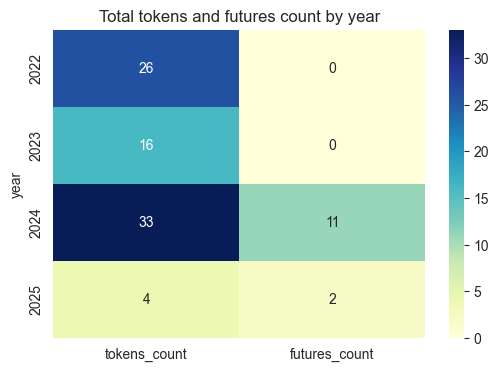

In [11]:
from src.api.binance_api import BinanceFutureAPI
from src.utilities.crypto_pairs import CryptoPairsEnum

future_pairs = set(BinanceFutureAPI().get_exchange_info(
    only_quote_assets=['USDT'],
    exclude_base_assets=CryptoPairsEnum.FIAT
).keys())

df = pd.DataFrame(articles)

df['datetime'] = pd.to_datetime(df['article_timestamp'], unit='ms')
df['year'] = df['datetime'].dt.year


def count_futures(tokens, futures_set):
    token: str
    pairs = [token.upper() + "USDT" for token in tokens]

    return sum(1 for token in pairs if token in futures_set)


df['tokens_count'] = df['tokens'].apply(len)
df['futures_count'] = df['tokens'].apply(lambda tokens: count_futures(tokens, future_pairs))
df['futures_ratio'] = df.apply(
    lambda row: row['futures_count'] / row['tokens_count'] if row['tokens_count'] > 0 else 0,
    axis=1
)

plt.figure(figsize=(8, 4))
sns.boxplot(x='year', y='tokens_count', data=df)
plt.title('Token count distribution by years')
plt.xlabel('year')
plt.ylabel('token count')
plt.show()

agg = df.groupby('year').agg({'tokens_count': 'sum', 'futures_count': 'sum'}).reset_index()
pivot = agg.set_index('year')
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Total tokens and futures count by year')
plt.ylabel('year')
plt.show()